In [157]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2

In [158]:
def PCA_color(image, n_components):

  # Read image
  img_original = plt.imread("img.jpg")
  print(f'----- Original image dimensions: {img_original.shape} -----')

  # Reshape image
  img_reshaped = np.reshape(img_original, (img_original.shape[0] * 3, img_original.shape[1]))
  print(f'------ Reshaped image dimensions: {img_reshaped.shape} ------')

  # Calculate mean
  image_mean = np.mean(img_reshaped , axis = 0)

  # Rescale
  image_scaled = img_reshaped - image_mean

  # calculate the covariance matrix
  covariance_matrix = np.cov(image_scaled, rowvar = False)

  # Calculate Eigenvalues and Eigenvectors of the covariance matrix
  eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

  # Get index of the largest eigen values
  sorted_index = np.argsort(eigen_values)[::-1]

  # Sort the eigen values and eigen vectors
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  # Subset the wanted number of components
  eigenvector_subset = sorted_eigenvectors[:,:n_components]

  # Compress the image
  img_compressed = np.dot(image_scaled, eigenvector_subset)
  print(f'---- Compressed image dimensions: {img_compressed.shape} ----')

  # Decompress the image
  img_decompressed = np.dot(img_compressed, eigenvector_subset.T) + image_mean
  img_decompressed_reshaped = np.reshape(img_decompressed, (img_original.shape[0], img_original.shape[1], 3)).astype(int)

  return img_original, img_decompressed_reshaped, img_reshaped, img_compressed, img_decompressed

In [159]:
img_original, img_decompressed_reshaped, img_reshaped, img_compressed, img_decompressed  = PCA_color('img.jpg', 15)

----- Original image dimensions: (512, 512, 3) -----
------ Reshaped image dimensions: (1536, 512) ------
---- Compressed image dimensions: (1536, 15) ----


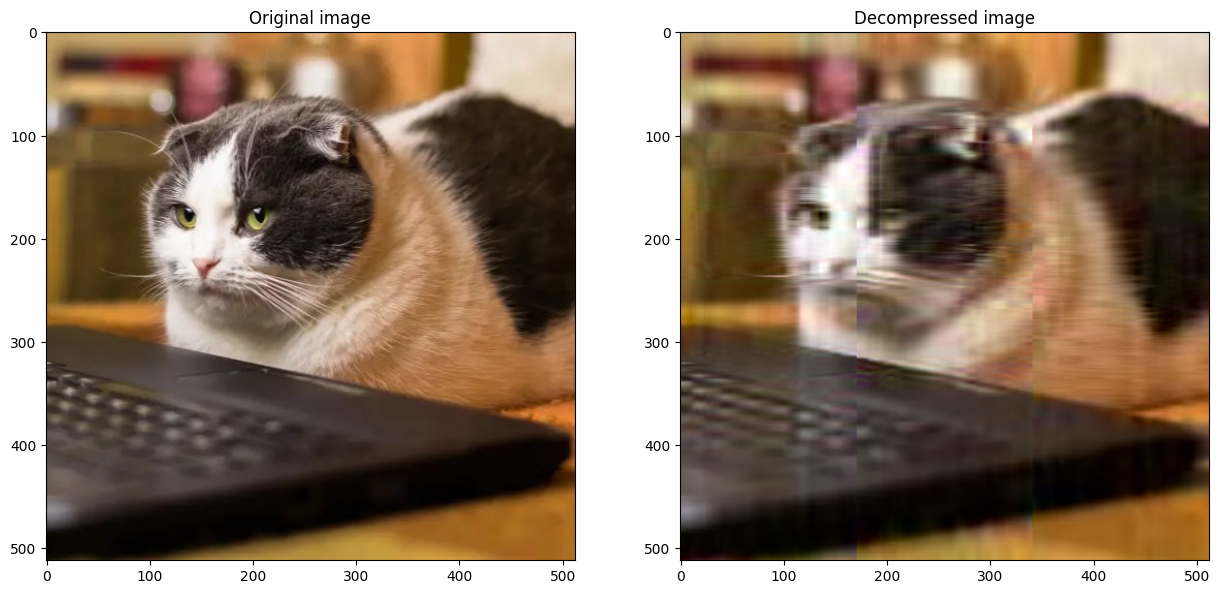

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].set(title = 'Original image')
ax[0].imshow(img_original)
ax[1].set(title = 'Decompressed image')
ax[1].imshow(img_decompressed_reshaped)
plt.show()

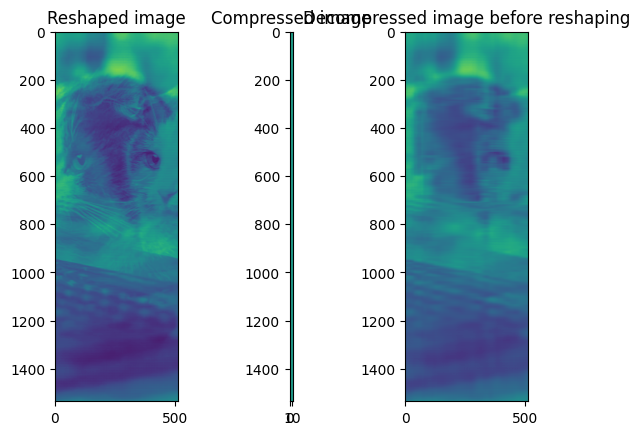

In [161]:
fig, ax = plt.subplots(1, 3) # , figsize=(15, 15)
ax[0].set(title = 'Reshaped image')
ax[0].imshow(img_reshaped)
ax[1].set(title = 'Compressed image')
ax[1].imshow(img_compressed)
ax[2].set(title = 'Decompressed image before reshaping')
ax[2].imshow(img_decompressed)
plt.show()